In [5]:
    import matplotlib, numpy as np
    from pylab import *
    #matplotlib.use('Agg')
    #    matplotlib.use('TkAgg')
    %matplotlib inline
    #import matplotlib.pyplot as plt
    # creation d'un vecteur temperature de -200 à 200 degrés
    # attention la dernière valeur est exclue
    T = np.arange(-200,250,50)
    Rpt = [18.44, 39.65, 60.20, 100, 119.40, 138.50, 157.32, 175.84]
    print(T)


[-200 -150 -100  -50    0   50  100  150  200]


In [6]:
data = np.loadtxt("donnees.dat")
print(data)


[[ 1.    2.1 ]
 [ 2.    2.9 ]
 [ 3.    4.2 ]
 [ 4.    5.05]
 [ 5.    5.85]
 [ 6.    6.95]
 [ 7.    8.1 ]
 [ 8.    9.  ]
 [ 9.   10.2 ]
 [10.   10.9 ]]


In [27]:
x = data[:,0]
print(x)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [28]:
y = data[:,1]
print(y)

[ 2.1   2.9   4.2   5.05  5.85  6.95  8.1   9.   10.2  10.9 ]


In [29]:
x, y = np.loadtxt("donnees.dat", unpack=True)
print(x)
print(y)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 2.1   2.9   4.2   5.05  5.85  6.95  8.1   9.   10.2  10.9 ]


In [32]:
parametres = np.polyfit(x, y, 1)
print(parametres)
a=parametres[0,]
b=parametres[1,]
print(a)
print(b)

[0.99727273 1.04      ]
0.9972727272727272
1.0399999999999971


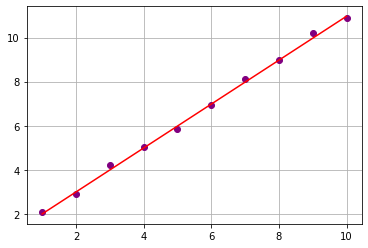

In [10]:
yest = a*x+b
plt.plot (x,y,color='purple', marker='o',linestyle='none')
plot(x,yest,'red')
grid()
plt.show()

In [11]:
import pandas as pd
import statsmodels.formula.api as sm
df = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})
result = sm.ols(formula="A ~ B + C", data=df).fit()
print(result.params)

Intercept    14.952480
B             0.401182
C             0.000352
dtype: float64


In [12]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     1.375
Date:                Fri, 15 Oct 2021   Prob (F-statistic):              0.421
Time:                        09:48:23   Log-Likelihood:                -18.178
No. Observations:                   5   AIC:                             42.36
Df Residuals:                       2   BIC:                             41.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.9525     17.764      0.842      0.4

/home/vs/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [13]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# data
np.random.seed(123)
df = pd.DataFrame(np.random.randint(0,100,size=(100, 3)), columns=list('ABC'))

# assign dependent and independent / explanatory variables
variables = list(df.columns)
y = 'A'
x = [var for var in variables if var not in y ]

# Ordinary least squares regression
model_Simple = sm.OLS(df[y], df[x]).fit()

# Add a constant term like so:
model = sm.OLS(df[y], sm.add_constant(df[x])).fit()

model.summary()
print(x)

['B', 'C']


/home/vs/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
import statsmodels.formula.api as smf
from statsmodels.api import add_constant
#Adding the column of 1s
X = smf.add_constant(x) 

#Fit the model and print output
lm2 = smf.ols(y,X)
results = lm2.fit()
print(results.summary())

AttributeError: module 'statsmodels.formula.api' has no attribute 'add_constant'

In [30]:
from scipy.stats import linregress

#Utilisons maintenant la méthode linregress.

a, b, r, p_value, std_err = linregress(x, y)
print("a   ={:8.3f}\nb   ={:8.3f}\nr^2 ={:8.5f}".format(a, b, r**2))
print(linregress(x,y))

a   =   0.997
b   =   1.040
r^2 = 0.99829
LinregressResult(slope=0.9972727272727272, intercept=1.0400000000000018, rvalue=0.9991440903051247, pvalue=2.3455446775218172e-12, stderr=0.014597444963041953, intercept_stderr=0.09057476402833185)


In [39]:
print(x)

['B', 'C']


In [45]:
from pandas import DataFrame
import statsmodels.api as sm

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = df['Stock_Index_Price']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           4.04e-11
Time:                        08:53:15   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

In [19]:
X = sm.add_constant(x) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4667.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           2.35e-12
Time:                        09:52:39   Log-Likelihood:                 7.1314
No. Observations:                  10   AIC:                            -10.26
Df Residuals:                       8   BIC:                            -9.658
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0400      0.091     11.482      0.0

/home/vs/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


a   =   0.997
b   =   1.040
r^2 = 0.99829
std_err    =0.01460

0.1811495280566637


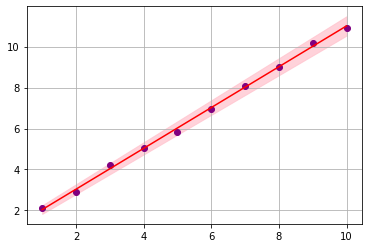

In [71]:
#Utilisons maintenant la méthode linregress.

a, b, r, p_value, std_err = linregress(x, y)
print("a   ={:8.3f}\nb   ={:8.3f}\nr^2 ={:8.5f}\nstd_err    ={:2.5f}\n".format(a, b, r**2, std_err))
#print(linregress(x,y))
results=linregress(x,y)
#dyfit=2*std_err
yest=  a*x+b
plt.plot (x,y,color='purple', marker='o',linestyle='none')
plot(x,yest,'red')
sa=2*std_err
sb=2*results.intercept_stderr
print(sb)
plt.fill_between(x, (a-sa)*x+b-sb,(a+sa)*x+b+sb, color='pink', alpha=0.7)
#plt.fill_between(x, (a-sa)*x+b-sb,(a+sa)*x+b+sb, color='pink', alpha=0.4)
grid()
plt.show()

In [33]:
import sklearn
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                     random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

ImportError: cannot import name 'GaussianProcess' from 'sklearn.gaussian_process' (/home/vs/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/__init__.py)

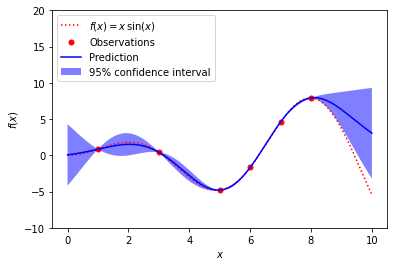

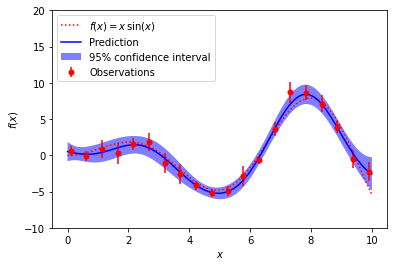

In [32]:
# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)


# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

In [29]:
parametres = np.polyfit(x, y, 1)
print(parametres)
a=parametres[0,]
b=parametres[1,]

[0.99727273 1.04      ]


IndexError: index 2 is out of bounds for axis 0 with size 2

        3     2
0.1667 x - 1 x + 3.833 x + 1.11e-14


(0.0, 12.0)

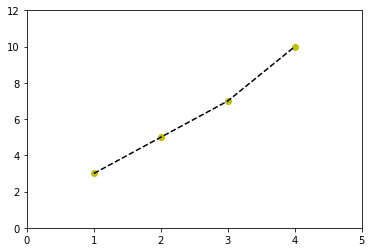

In [54]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4]
y = [3,5,7,10] # 10, not 9, so the fit isn't perfect

coef = np.polyfit(x,y,3)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
print(poly1d_fn)
plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.xlim(0, 5)
plt.ylim(0, 12)

[0.99727273 1.04      ]
[[ 0.00021309 -0.00117197]
 [-0.00117197  0.00820379]]
[0.01459744 0.09057476]
0.014597444381205606
0.09057476112155641


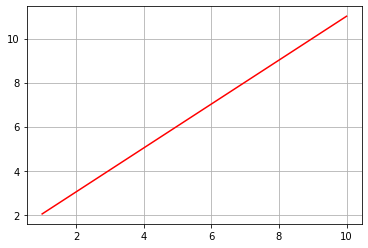

In [37]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, a, b):
    return a* x + b

popt, pcov = curve_fit(func, x, y)
print(popt)
p_sigma = np.sqrt(np.diag(pcov))
print(pcov)
print(p_sigma)
sa = print(p_sigma[0,])
sb = print(p_sigma[1,])

plt.plot(x, func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.grid()

In [13]:
stderr=0.014597444963041953
intercept_stderr=0.09057476402833185

NameError: name 'Zip' is not defined

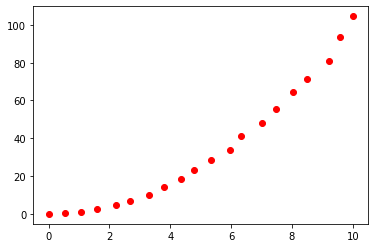

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def kalman_xy(x, P, measurement, R,
              motion = np.matrix('0. 0. 0. 0.').T,
              Q = np.matrix(np.eye(4))):
    """
    Parameters:    
    x: initial state 4-Tuple of location and velocity: (x0, x1, x0_dot, x1_dot)
    P: initial uncertainty convariance matrix
    measurement: observed position
    R: measurement noise 
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    """
    return kalman(x, P, measurement, R, motion, Q,
                  F = np.matrix('''
                      1. 0. 1. 0.;
                      0. 1. 0. 1.;
                      0. 0. 1. 0.;
                      0. 0. 0. 1.
                      '''),
                  H = np.matrix('''
                      1. 0. 0. 0.;
                      0. 1. 0. 0.'''))

def kalman(x, P, measurement, R, motion, Q, F, H):
    '''
    Parameters:
    x: initial state
    P: initial uncertainty convariance matrix
    measurement: observed position (same shape as H*x)
    R: measurement noise (same shape as H)
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    F: next state function: x_prime = F*x
    H: measurement function: position = H*x

    Return: the updated and predicted new values for (x, P)

    See also http://en.wikipedia.org/wiki/Kalman_filter

    This version of kalman can be applied to many different situations by
    appropriately defining F and H 
    '''
    # UPDATE x, P based on measurement m    
    # distance between measured and current position-belief
    y = np.matrix(measurement).T - H * x
    S = H * P * H.T + R  # residual convariance
    K = P * H.T * S.I    # Kalman gain
    x = x + K*y
    I = np.matrix(np.eye(F.shape[0])) # identity matrix
    P = (I - K*H)*P

    # PREDICT x, P based on motion
    x = F*x + motion
    P = F*P*F.T + Q

    return x, P

def demo_kalman_xy():
    x = np.matrix('0. 0. 0. 0.').T 
    P = np.matrix(np.eye(4))*1000 # initial uncertainty

    N = 20
    true_x = np.linspace(0.0, 10.0, N)
    true_y = true_x**2
    observed_x = true_x + 0.05*np.random.random(N)*true_x
    observed_y = true_y + 0.05*np.random.random(N)*true_y
    plt.plot(observed_x, observed_y, 'ro')
    result = []
    R = 0.01**2
    for meas in Zip(observed_x, observed_y):
        x, P = kalman_xy(x, P, meas, R)
        result.append((x[:2]).tolist())
    kalman_x, kalman_y = Zip(*result)
    plt.plot(kalman_x, kalman_y, 'g-')
    plt.show()

demo_kalman_xy()
